## zad_18_2

Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)
    
Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

Albumentation library
Open CV library
Ten kurs ma pokazywać, jak w rzeczywistości pracuje się z TensorFlow, a realia są takie, że bardzo często większość pracy to odkrywanie nowych rzeczy. Dlatego podajemy tylko linki do bibliotek – jak należy ich użyć, trzeba wywnioskować samemu :)

### import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import albumentations as A
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping


Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [3]:
# wczytanie danych
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# wydobycie obrazow oraz etykiet
images, labels = train

In [5]:
# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

In [6]:
# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [7]:

# podzial na częsci treningowa i testowa
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [8]:
# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(5000).batch(32)

#### tworzenie modelu

In [9]:

f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    # layers.Flatten(),
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(450, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])






c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
f_mnist_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 450)            │       353,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       135,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,210 (2.04 MB)

 Trainable params: 535,210 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

#### kompilacja modelu

In [11]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer='adam',
    optimizer='AdamW',
    metrics=['accuracy']
)

#### szkolenie

In [12]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

#train_stats = f_mnist_model.fit(train_ds, epochs=50, verbose=1)


train_stats = f_mnist_model.fit(
    train_ds,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8241 - loss: 0.4868
Epoch 2/50
   6/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8778 - loss: 0.4085 

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8651 - loss: 0.3701
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8775 - loss: 0.3298
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8856 - loss: 0.3092
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8915 - loss: 0.2920
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8963 - loss: 0.2762
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9019 - loss: 0.2618
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9057 - loss: 0.2528
Epoch 9/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9080 - loss: 0.2431
Epoch 10/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9108 - loss: 0.2346
Epoch 11/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9152 - loss: 0.2203
Epoch 12/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9182 - loss: 0.2148
Epoch 13/50
1688/16

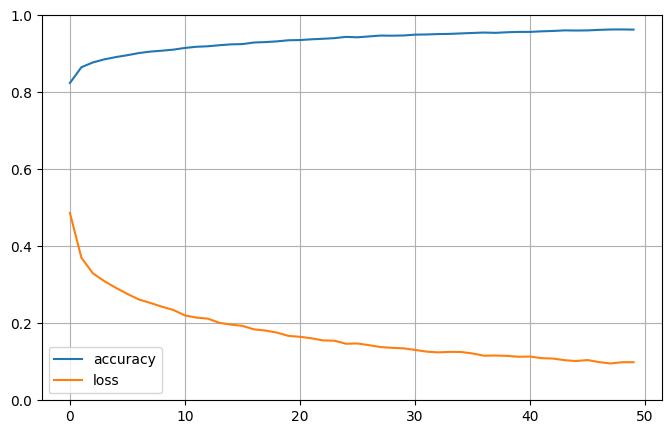

In [13]:


pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### predykcja

In [14]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
probs :  [1.2271215e-12 6.2947921e-16 2.4147442e-15 9.4495663e-16 6.1887435e-16
 5.0792704e-07 2.0456149e-14 9.9999380e-01 1.2393894e-10 5.6917829e-06]
klasa : 7
rzeczywista klasa:  7


#### accurancy na zbiorze testowym

In [15]:
loss, acc = f_mnist_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy na zbiorze testowym: {acc:.4f}")
print(f"Straty na zbiorze testowym: {loss:.4f}")

Accuracy na zbiorze testowym: 0.9007
Straty na zbiorze testowym: 0.5377


Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

In [16]:
# zapisanie wytrenowanego modelu
f_mnist_model.save("fashion_mnist_model.h5")

# wczytanie modelu w innym miejscu
from tensorflow.keras.models import load_model
loaded_model = load_model("fashion_mnist_model.h5")

In [17]:
# Wczytaj model
model = load_model("fashion_mnist_model.h5")

# Nazwy klas w Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def predict_and_show(image, model=model):
    """
    image: pojedynczy obrazek 28x28 (numpy array)
    model: załadowany model Keras
    """
    # upewnij się, że ma odpowiedni kształt i zakres [0,1]
    img = image.reshape(1, 28, 28).astype("float32") / 255.0
    
    # predykcja
    preds = model.predict(img)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # pokazanie obrazka
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


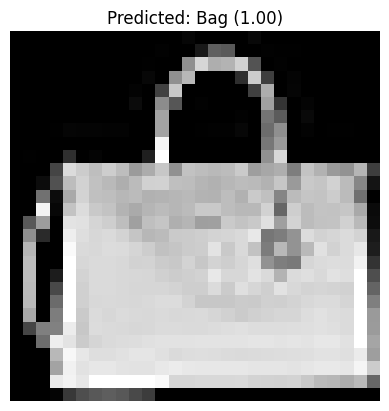

Prawdziwa klasa: Bag


In [18]:
# test interfejsu

# Załaduj dane Fashion-MNIST
(_, _), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Przykład: weź pierwszy obrazek ze zbioru testowego
pred_class, conf = predict_and_show(X_test[30], model)
print(f"Prawdziwa klasa: {class_names[y_test[30]]}")

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

Albumentation library
Open CV library

#### albumentations

In [19]:
# Definicja transformacji
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2)
])

def augment_images(images, labels, n_augmented=2):
    """
    images: numpy array (N,28,28,1)
    labels: numpy array (N,)
    n_augmented: ile razy powielamy każdy obraz
    """
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images, labels):
        img_np = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        img_np = img_np.squeeze()  # Albumentations oczekuje shape (H,W,C) lub (H,W)

        for _ in range(n_augmented):
            aug = transform(image=img_np)
            aug_img = aug['image']

            # upewniamy się, że ma wymiar (28,28,1) i typ float32
            aug_img = aug_img.astype(np.float32) / 255.0
            aug_img = np.expand_dims(aug_img, axis=-1)

            augmented_images.append(aug_img)
            augmented_labels.append(label)

    return np.array(augmented_images, dtype=np.float32), np.array(augmented_labels)


c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [20]:
X_train_aug, y_train_aug = augment_images(X_train, y_train, n_augmented=2)
print(f"Rozmiar danych po augmentacji: {X_train_aug.shape}")

Rozmiar danych po augmentacji: (108000, 28, 28, 1)


In [21]:

model_aug  = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    # layers.Flatten(),
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(450, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_aug.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer='adam',
    optimizer='AdamW',
    metrics=['accuracy']
)

In [23]:
# Trening modelu na danych augmentowanych
#model_aug = f_mnist_model.fit
history_aug = model_aug.fit(X_train_aug, y_train_aug, epochs=50, batch_size=64,
                            validation_split=0.1)

Epoch 1/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7612 - loss: 0.6359 - val_accuracy: 0.8025 - val_loss: 0.5289
Epoch 2/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8124 - loss: 0.4970 - val_accuracy: 0.8323 - val_loss: 0.4382
Epoch 3/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8300 - loss: 0.4484 - val_accuracy: 0.8310 - val_loss: 0.4485
Epoch 4/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8399 - loss: 0.4173 - val_accuracy: 0.8363 - val_loss: 0.4292
Epoch 5/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8508 - loss: 0.3906 - val_accuracy: 0.8471 - val_loss: 0.4137
Epoch 6/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8584 - loss: 0.3692 - val_accuracy: 0.8411 - val_loss: 0.4223
Epoch 7/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8648 - loss: 0.3513 - val_accuracy: 0.8494 - val_loss: 0.4152
Epoch 8/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8697 - loss:

<function matplotlib.pyplot.show(close=None, block=None)>

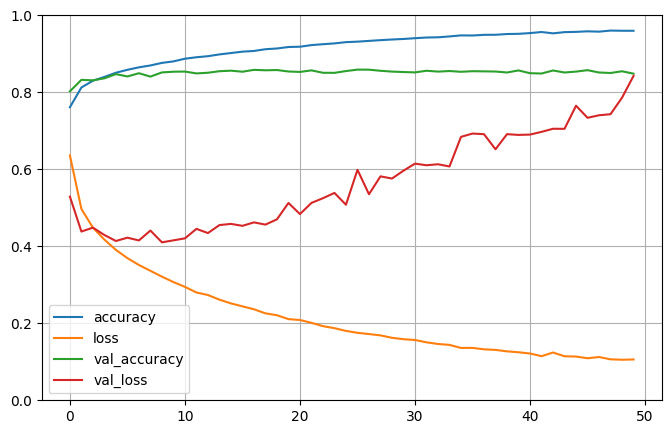

In [24]:
pd.DataFrame(history_aug.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [25]:
# predykcja
y_pred = model_aug.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
probs :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
klasa : 1
rzeczywista klasa:  1


In [26]:
loss, acc = model_aug.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy na zbiorze testowym: {acc:.4f}")
print(f"Straty na zbiorze testowym: {loss:.4f}")

Accuracy na zbiorze testowym: 0.8402
Straty na zbiorze testowym: 157.8930


Niestety nie udało mi się uzyskać wyników zblizonych do podanych w tresci zadania. 